### 13 RANDOM WALKS AND MORE ABOUT DATA VISUALIZATION

In [12]:
class Location(object):
    def __init__(self, x, y):
        """x and y are floats"""
        self.x = x
        self.y = y

    def move(self, deltaX, deltaY):
        """deltaX and deltaY are floats"""
        return Location(self.x + deltaX, self.y + deltaY)
    
    def getX(self):
        return self.x
    
    def getY(self):
        return self.y
    
    def distFrom(self, other):
        ox = other.x
        oy = other.y
        xDist = self.x - ox
        yDist = self.y - oy
        return (xDist**2 + yDist**2)**0.5
    
    def __str__(self):
        return '<' + str(self.x) + ', ' + str(self.y) + '>'

In [13]:
class Field(object):
    
    def __init__(self):
        self.drunks = {}

    def addDrunk(self, drunk, loc):
        if drunk in self.drunks:
            raise ValueError('Duplicate drunk')
        else:
            self.drunks[drunk] = loc

    def moveDrunk(self, drunk):
        if drunk not in self.drunks:
            raise ValueError('Drunk not in field')
        xDist, yDist = drunk.takeStep()
        currentLocation = self.drunks[drunk]
        #use move method of Location to get new location
        self.drunks[drunk] = currentLocation.move(xDist, yDist)

    def getLoc(self, drunk):
        if drunk not in self.drunks:
            raise ValueError('Drunk not in field')
        return self.drunks[drunk]

In [14]:
class Drunk(object):
    def __init__(self, name = None):
        """Assumes name is a str"""
        self.name = name

    def __str__(self):
        if self != None:
            return self.name
        return 'Anonymous'
    
class UsualDrunk(Drunk):
        def takeStep(self):
            stepChoices = [(0.0,1.0), (0.0,-1.0), (1.0, 0.0), (-1.0, 0.0)]
            return random.choice(stepChoices)


In [15]:
class Drunk(object):
    def __init__(self, name=None):
        """Assumes name is a str"""
        self.name = name

    def __str__(self):
        if self.name != None:
            return self.name
        return 'Anonymous'

class UsualDrunk(Drunk):
    def takeStep(self):
        stepChoices = [(0.0, 1.0), (0.0, -1.0), (1.0, 0.0), (-1.0, 0.0)]
        return random.choice(stepChoices)  # Make sure to import random at the top of your script


In [18]:
def CV(X):
    mean = sum(X)/float(len(X))
    try:
        return stdDev(X)/mean
    except ZeroDivisionError:
        return float('nan')

In [22]:
def stdDev(X):
    """Assumes that X is a list of numbers.
    Returns the standard deviation of X"""
    mean = float(sum(X))/len(X)
    tot = 0.0
    for x in X:
        tot += (x - mean)**2
    return (tot/len(X))**0.5 #Square root of mean difference

In [23]:
import random

def walk(f, d, numSteps):
    """Assumes: f a Field, d a Drunk in f, and numSteps an int >= 0.
    Moves d numSteps times, and returns the difference between
    the final location and the location at the start of the walk."""
    start = f.getLoc(d)
    for s in range(numSteps):
        f.moveDrunk(d)
    return start.distFrom(f.getLoc(d))

def simWalks(numSteps, numTrials, dClass):
    """Assumes numSteps an int >= 0, numTrials an int > 0,
    dClass a subclass of Drunk
    Simulates numTrials walks of numSteps steps each.
    Returns a list of the final distances for each trial"""
    Homer = dClass()
    origin = Location(0.0, 0.0)
    distances = []
    for t in range(numTrials):
        f = Field()
        f.addDrunk(Homer, origin)
        distances.append(walk(f, Homer, numTrials))
    return distances
def drunkTest(walkLengths, numTrials, dClass):
    """Assumes walkLengths a sequence of ints >= 0
    numTrials an int > 0, dClass a subclass of Drunk
    For each number of steps in walkLengths, runs simWalks with
    numTrials walks and prints results"""
    for numSteps in walkLengths:
        distances = simWalks(numSteps, numTrials, dClass)
        print(dClass.__name__, 'random walk of', numSteps, 'steps')
        print(' Mean =', sum(distances)/len(distances), 'CV =', CV(distances))
        print(' Max =', max(distances), 'Min =', min(distances))


In [24]:
drunkTest((10, 100, 1000, 10000), 100, UsualDrunk)

UsualDrunk random walk of 10 steps
 Mean = 9.900814961745134 CV = 0.4291549522184103
 Max = 21.95449840010015 Min = 2.0
UsualDrunk random walk of 100 steps
 Mean = 8.852180152504605 CV = 0.5208590537848587
 Max = 22.847319317591726 Min = 1.4142135623730951
UsualDrunk random walk of 1000 steps
 Mean = 8.900234725573993 CV = 0.5636429747734909
 Max = 21.587033144922902 Min = 1.4142135623730951
UsualDrunk random walk of 10000 steps
 Mean = 8.851521500497324 CV = 0.49825103067413945
 Max = 19.849433241279208 Min = 2.0


In [25]:
drunkTest((0,1), 100, UsualDrunk)

UsualDrunk random walk of 0 steps
 Mean = 8.926557329781923 CV = 0.5483127677093936
 Max = 26.419689627245813 Min = 0.0
UsualDrunk random walk of 1 steps
 Mean = 9.086480191847384 CV = 0.5156793224382776
 Max = 19.6468827043885 Min = 1.4142135623730951


#### 13.2 Biased Random Walks

In [27]:
class ColdDrunk(Drunk):
    def takeStep(self):
        stepChoices = [(0.0,1.0), (0.0,-2.0), (1.0, 0.0), (-1.0, 0.0)]
        return random.choice(stepChoices)

class EWDrunk(Drunk):
    def takeStep(self):
        stepChoices = [(1.0, 0.0), (-1.0, 0.0)]
        return random.choice(stepChoices)
    
def simAll(drunkKinds, walkLengths, numTrials):
    for dClass in drunkKinds:
        drunkTest(walkLengths, numTrials, dClass)

In [28]:
simAll((UsualDrunk, ColdDrunk, EWDrunk), (100, 1000), 10)

UsualDrunk random walk of 100 steps
 Mean = 2.6535460158046194 CV = 0.4704936266158276
 Max = 4.47213595499958 Min = 0.0
UsualDrunk random walk of 1000 steps
 Mean = 3.235952469267582 CV = 0.5104682415842441
 Max = 5.830951894845301 Min = 1.4142135623730951
ColdDrunk random walk of 100 steps
 Mean = 4.7546122933701325 CV = 0.6201350312567422
 Max = 11.40175425099138 Min = 1.0
ColdDrunk random walk of 1000 steps
 Mean = 4.472944031946376 CV = 0.4685714803655554
 Max = 7.810249675906654 Min = 1.4142135623730951
EWDrunk random walk of 100 steps
 Mean = 3.2 CV = 0.7499999999999999
 Max = 6.0 Min = 0.0
EWDrunk random walk of 1000 steps
 Mean = 1.8 CV = 1.1600340565456166
 Max = 6.0 Min = 0.0


In [29]:
class styleIterator(object):
    def __init__(self, styles):
        self.index = 0
        self.styles = styles
    def nextStyle(self):
        result = self.styles[self.index]
        if self.index == len(self.styles) - 1:
            self.index = 0
        else:
            self.index += 1
        return result

Starting simulation of UsualDrunk
Starting simulation of 10 steps
Starting simulation of 100 steps
Starting simulation of 1000 steps
Starting simulation of 10000 steps
Starting simulation of 100000 steps
Starting simulation of ColdDrunk
Starting simulation of 10 steps
Starting simulation of 100 steps
Starting simulation of 1000 steps
Starting simulation of 10000 steps
Starting simulation of 100000 steps
Starting simulation of EWDrunk
Starting simulation of 10 steps
Starting simulation of 100 steps
Starting simulation of 1000 steps
Starting simulation of 10000 steps
Starting simulation of 100000 steps


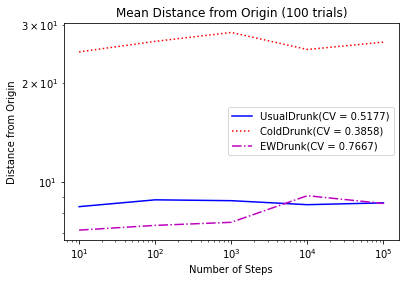

In [32]:
import pylab
def simDrunk(numTrials, dClass, walkLengths):
    meanDistances = []
    cvDistances = []
    for numSteps in walkLengths:
        print('Starting simulation of', numSteps, 'steps')
        trials = simWalks(numSteps, numTrials, dClass)
        mean = sum(trials)/float(len(trials))
        meanDistances.append(mean)
        cvDistances.append(stdDev(trials)/mean)
    return (meanDistances, cvDistances)

def simAll(drunkKinds, walkLengths, numTrials):
    styleChoice = styleIterator(('b-', 'r:', 'm-.'))
    for dClass in drunkKinds:
        curStyle = styleChoice.nextStyle()
        print('Starting simulation of', dClass.__name__)
        means, cvs = simDrunk(numTrials, dClass, walkLengths)
        cvMean = sum(cvs)/float(len(cvs))
        pylab.plot(walkLengths, means, curStyle,
        label = dClass.__name__ +
        '(CV = ' + str(round(cvMean, 4)) + ')')
    pylab.title('Mean Distance from Origin ('
    + str(numTrials) + ' trials)')
    pylab.xlabel('Number of Steps')
    pylab.ylabel('Distance from Origin')
    pylab.legend(loc = 'best')
    pylab.semilogx()
    pylab.semilogy()

simAll((UsualDrunk, ColdDrunk, EWDrunk), (10,100,1000,10000,100000), 100)

In [ ]:
def getFinalLocs(numSteps, numTrials, dClass):
    locs = []
    d = dClass()
    origin = Location(0, 0)
    for t in range(numTrials):
        f = Field()
        f.addDrunk(d, origin)
        for s in range(numSteps):
            f.moveDrunk(d)
        locs.append(f.getLoc(d))
    return locs

def plotLocs(drunkKinds, numSteps, numTrials):
    styleChoice = styleIterator(('b+', 'r^', 'mo'))
    for dClass in drunkKinds:
        locs = getFinalLocs(numSteps, numTrials, dClass)
        xVals, yVals = [], []
        for l in locs:
            xVals.append(l.getX())
            yVals.append(l.getY())
        meanX = sum(xVals)/float(len(xVals))
        meanY = sum(yVals)/float(len(yVals))
        curStyle = styleChoice.nextStyle()
    pylab.plot(xVals, yVals, curStyle,
    label = dClass.__name__ + ' Mean loc. = <'
    + str(meanX) + ', ' + str(meanY) + '>')
    pylab.title('Location at End of Walks ('
    + str(numSteps) + ' steps)')
    pylab.xlabel('Steps East/West of Origin')
    pylab.ylabel('Steps North/South of Origin')
    pylab.legend(loc = 'lower left', numpoints = 1)

plotLocs((UsualDrunk, ColdDrunk, EWDrunk), 100, 200)

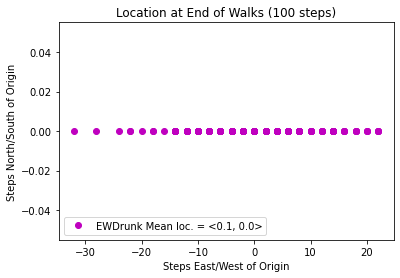

In [34]:
plotLocs((UsualDrunk, ColdDrunk, EWDrunk), 100, 200)

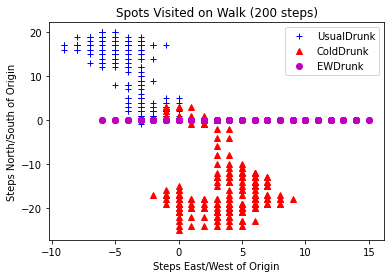

In [36]:
def traceWalk(drunkKinds, numSteps):
    styleChoice = styleIterator(('b+', 'r^', 'mo'))
    f = Field()
    for dClass in drunkKinds:
        d = dClass()
        f.addDrunk(d, Location(0, 0))
        locs = []
        for s in range(numSteps):
            f.moveDrunk(d)
            locs.append(f.getLoc(d))
        xVals = []
        yVals = []
        for l in locs:
            xVals.append(l.getX())
            yVals.append(l.getY())
        curStyle = styleChoice.nextStyle()
        pylab.plot(xVals, yVals, curStyle,
        label = dClass.__name__)
    pylab.title('Spots Visited on Walk ('
    + str(numSteps) + ' steps)')
    pylab.xlabel('Steps East/West of Origin')
    pylab.ylabel('Steps North/South of Origin')
    pylab.legend(loc = 'best')
traceWalk((UsualDrunk, ColdDrunk, EWDrunk), 200)

In [39]:
class oddField(Field):
    def __init__(self, numHoles, xRange, yRange):
        Field.__init__(self)
        self.wormholes = {}
        for w in range(numHoles):
            x = random.randint(-xRange, xRange)
            y = random.randint(-yRange, yRange)
            newX = random.randint(-xRange, xRange)
            newY = random.randint(-yRange, yRange)
            newLoc = Location(newX, newY)
            self.wormholes[(x, y)] = newLoc

    def moveDrunk(self, drunk):
        Field.moveDrunk(self, drunk)
        x = self.drunks[drunk].getX()
        y = self.drunks[drunk].getY()
        if (x, y) in self.wormholes:
            self.drunks[drunk] = self.wormholes[(x, y)]

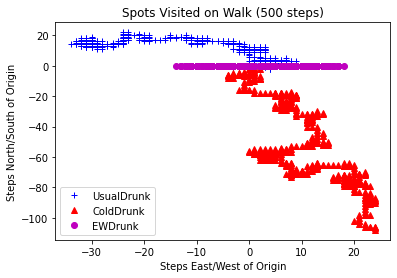

In [40]:
traceWalk((UsualDrunk, ColdDrunk, EWDrunk), 500)